In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load dataset

In [2]:
digits = pd.read_csv('Data/train.csv')

In [5]:
X = digits.drop('label', axis=1)
y = digits['label']

### Digit visualization

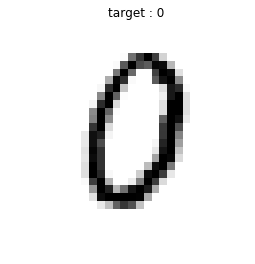

In [35]:
index = 5
digit = X.iloc[index, :]

fig, ax = plt.subplots()
ax.imshow(digit.values.reshape(28,28), cmap='gray_r', )
ax.set_title('target : ' + str(y[index]))
ax.axis('off');